# **Classifying retail products into the four categories:**

⭐ **Stars** – High sales, high margin, high traffic

🚦 **Traffic Builders** – High traffic/units sold, low margin

💎 **Hidden Gems** – Low traffic, high margin, strong profitability

🪦 **Dead Stock** – Low sales, low margin, low movement


# **Why? Actionable Insights by Product Classification**

⭐ **Stars**

**High sales + high margin = core profit and growth drivers**


🔍 **What this signals**

Customers love these products.

They are efficient revenue and margin contributors.

They turn inventory quickly.


✅ **Recommended Actions**

**Increase stock levels** to avoid sellouts and lost revenue.

**Prioritize in marketing campaigns** (newsletter top spots, homepage placements).

**Expand variants** (new colors, sizes, bundles) to extend winning lines.

**Use Stars as anchor items** in promotions to drive cross-sells.

**Monitor competitor pricing** to maintain leadership without margin erosion.

---

🚦 **Traffic Builders**

**High sales + low margin = strong traffic but weak profitability**

🔍 **What this signals**

These products bring customers in.

They may be price-sensitive or competitively positioned.

✅ **Recommended Actions**

**Consider slight price increases** if demand is inelastic.

**Optimize cost of goods** (supplier renegotiation, packaging adjustments).

**Bundle with higher**-margin products to lift overall profitability.

**Place strategically in-store or online** to maximize conversion flow (e.g., category landing pages).

**Limit excessive discounting**—these already sell well.

---

💎 **Hidden Gems**

**Low sales + high margin = high potential products underexposed**

🔍 **What this signals**

Great profitability but low customer awareness.

Possible opportunity being missed.

✅ **Recommended Actions**

**Increase visibility** (recommendations, featured placements, staff picks).

**Test promotional nudges** (e.g., small discounts or bundles) to increase volume.

**Improve product descriptions or visual assets** to boost appeal.

**Check placement within store navigation**—may be buried too deep.

**Investigate customer segments** who buy them and target similar audiences.

---

🪦 **Dead Stock**

**Low sales + low margin + slow turnover = inventory risk**

🔍 **What this signals**

Inventory is tying up cash.

Customer demand is weak or nonexistent.

Risk of obsolescence or markdown necessity.

✅ **Recommended Actions**

Aggressive markdowns to clear stock and free working capital.

**Identify root causes:**

Poor product-market fit

Wrong sizes/colors

Low visibility

Pricing mismatch

**Avoid reorders** until drivers of low performance are understood.

**Use in clearance events or bundles** to recover some value.

**Feed into demand forecasting** as negative indicators.


# **✔ Portfolio-Level Insights (Cross-Category)**

📌 1. **Balance your product mix**

A healthy assortment has:
*   ~10–20% **Stars**
*   ~20–30% **Traffic Builders**
*   ~10–15% **Hidden Gems**
*   <10% **Dead Stock**

A high % of Dead Stock signals planning or demand forecasting issues.

---

📌 2. **Identify category gaps**

If some categories have many Traffic Builders but few Stars, consider:
*   Innovatin
*   Design updates
*   Product research

If Hidden Gems cluster around specific categories, consider:
*   Investing in marketing for those categories.

---

📌 3. **Strengthen pricing strategy**

*   **Stars:** Maintain or carefully test upward pricing.
*   **Traffic Builders:** Watch margins and avoid unnecessary promotions.
*  **Hidden Gems:** Explore visibility before changing price.
*   **Dead Stock**: Mark down early to minimize losses.
---

📌 4. **Guide inventory decisions**

*   **Stars** → Increase buy depth
*   **Traffic Builders** → Maintain steady flow
*   **Hidden Gems** → Controlled restocks tied to demand tests
*   **Dead Stock** → Reduce or eliminate future buys

# **These are made-up rules corresponding to the labels above:**

⭐ **Stars**

Units Sold high > 1500

Margin % high > 20%

🚦 **Traffic Builders**

Units Sold high (> 1500)

Margin % low (< 20%)

💎 **Hidden Gems**

Units Sold low (< 1000)

Margin % high (> 30%)

🪦 **Dead Stock**

Units Sold low (< 300)

Margin % low (< 15%)

Long inventory days (> 70)

**other**

unclassified

In [ ]:
#import the products file
import pandas as pd
import numpy as np
df = pd.read_csv('/content/products.csv')
display(df.head())

,Product_ID,Product_Name,Category,Units_Sold,Margin_%,Inventory_Days,Price
0,1,Echo Edge,Apparel,5694,42,54,243
1,2,Flare Core,Fitness,2572,51,47,233
2,3,Flare Core,Footwear,1425,37,138,200
3,4,Echo Boost,Gear,5384,57,10,159
4,5,Drift Flex,Apparel,5538,24,113,285


In [ ]:
#set conditions for classification

conditions = [
    (df['Units_Sold'] >= 1500) & (df['Margin_%'] >= 20),
    (df['Units_Sold'] >= 1500) & (df['Margin_%'] < 20),
    (df['Units_Sold'] < 1500)  & (df['Margin_%'] >= 30),
    ((df['Units_Sold'] < 300) & (df['Margin_%'] < 15)) | (df['Inventory_Days'] > 70)
]

choices = [
    "Star",
    "Traffic Builder",
    "Hidden Gem",
    "Dead Stock"
]

df['Classification'] = np.select(conditions, choices, default="Other")

In [ ]:
#display the final file with classification
display(df.head())

,Product_ID,Product_Name,Category,Units_Sold,Margin_%,Inventory_Days,Price,Classification
0,1,Echo Edge,Apparel,5694,42,54,243,Star
1,2,Flare Core,Fitness,2572,51,47,233,Star
2,3,Flare Core,Footwear,1425,37,138,200,Hidden Gem
3,4,Echo Boost,Gear,5384,57,10,159,Star
4,5,Drift Flex,Apparel,5538,24,113,285,Star


<Figure size 1400x700 with 0 Axes>

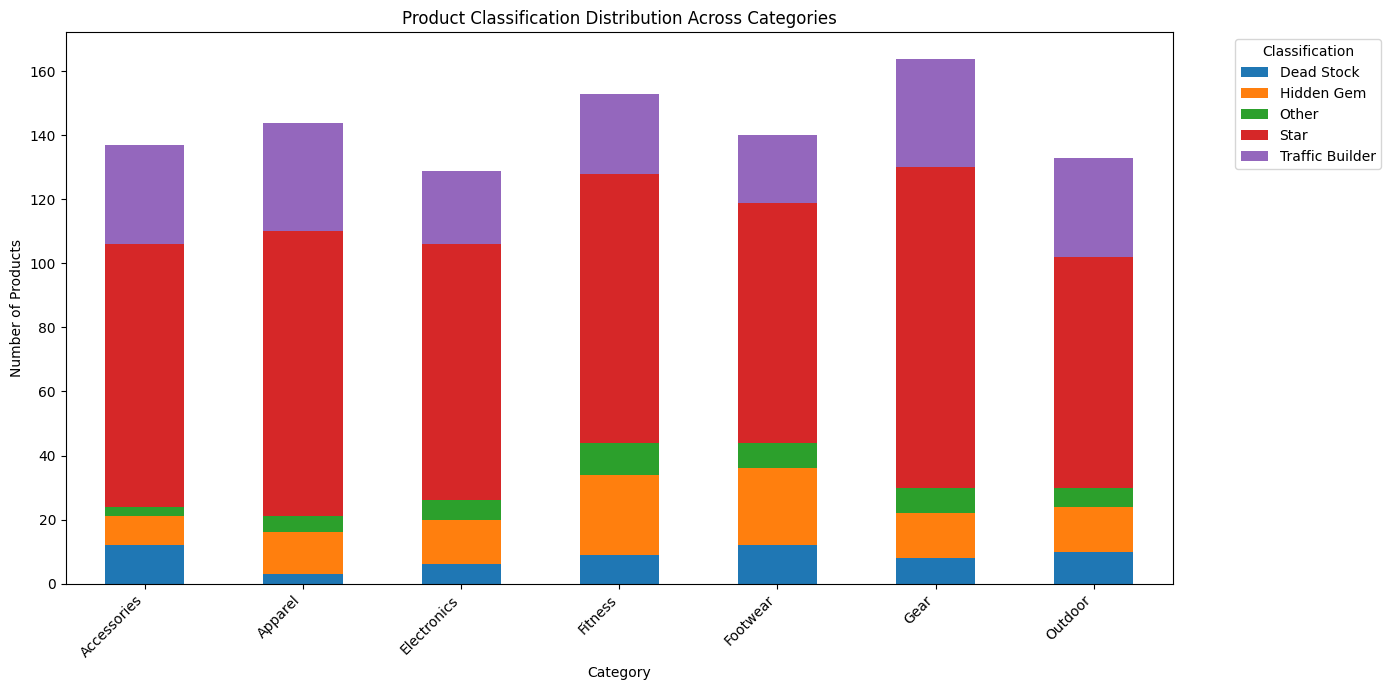

# Compare results with the Ideal Portfolio Mix

In [10]:
classification_counts = df['Classification'].value_counts()
total_products = len(df)

star_count = classification_counts.get('Star', 0)
traffic_builder_count = classification_counts.get('Traffic Builder', 0)
hidden_gem_count = classification_counts.get('Hidden Gem', 0)
dead_stock_count = classification_counts.get('Dead Stock', 0)
other_count = classification_counts.get('Other', 0)

star_percentage = (star_count / total_products) * 100
traffic_builder_percentage = (traffic_builder_count / total_products) * 100
hidden_gem_percentage = (hidden_gem_count / total_products) * 100
dead_stock_percentage = (dead_stock_count / total_products) * 100
other_percentage = (other_count / total_products) * 100

summary_markdown = f"""
### **Product Classification Summary**

Based on the defined rules, here's the current distribution of your products across the categories:

*   **Stars**: High sales, high margin, high traffic (currently {star_count} products, or {star_percentage:.2f}%)
*   **Traffic Builders**: High traffic/units sold, low margin (currently {traffic_builder_count} products, or {traffic_builder_percentage:.2f}%)
*   **Hidden Gems**: Low traffic, high margin, strong profitability (currently {hidden_gem_count} products, or {hidden_gem_percentage:.2f}%)
*   **Dead Stock**: Low sales, low margin, low movement (currently {dead_stock_count} products, or {dead_stock_percentage:.2f}%)
*   **Other**: Products that do not fit into the above categories (currently {other_count} products, or {other_percentage:.2f}%)

---

**Ideal Portfolio Mix (for comparison):**

*   ~10–20% **Stars**
*   ~20–30% **Traffic Builders**
*   ~10–15% **Hidden Gems**
*   <10% **Dead Stock**

This summary provides a quick overview of your product portfolio's health, allowing you to identify areas that might need attention based on the recommended actions for each category outlined earlier.
"""

from IPython.display import Markdown
display(Markdown(summary_markdown))


### **Product Classification Summary**

Based on the defined rules, here's the current distribution of your products across the categories:

*   **Stars**: High sales, high margin, high traffic (currently 582 products, or 58.20%)
*   **Traffic Builders**: High traffic/units sold, low margin (currently 199 products, or 19.90%)
*   **Hidden Gems**: Low traffic, high margin, strong profitability (currently 113 products, or 11.30%)
*   **Dead Stock**: Low sales, low margin, low movement (currently 60 products, or 6.00%)
*   **Other**: Products that do not fit into the above categories (currently 46 products, or 4.60%)

---

**Ideal Portfolio Mix (for comparison):**

*   ~10–20% **Stars**
*   ~20–30% **Traffic Builders**
*   ~10–15% **Hidden Gems**
*   <10% **Dead Stock**

This summary provides a quick overview of your product portfolio's health, allowing you to identify areas that might need attention based on the recommended actions for each category outlined earlier.
